# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


## 4.1 Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [82]:
df = pd.read_csv('D:\MLZoomcamp\module-4\Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [83]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [84]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [85]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [87]:
len(y_val)

1409

In [88]:
(y_val == churn_decision).sum()

1132

In [89]:
(y_val == churn_decision).mean()

0.8034066713981547

In [90]:
#accuracy
1132/ 1409

0.8034066713981547

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [93]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


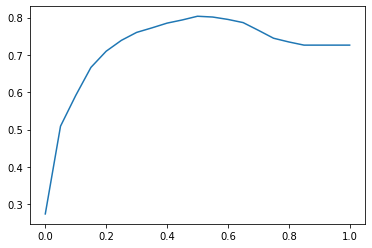

In [94]:
plt.plot(thresholds, scores)

In [95]:
y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [96]:
from collections import Counter

#for counting how many true values or false values

In [97]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [98]:
Counter(y_val)

Counter({0: 1023, 1: 386})

most everyone is no churning

In [99]:
y_val.mean()

0.2739531582682754

In [100]:
1 - y_val.mean()

0.7260468417317246

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [101]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [102]:
t = 0.5 #threshold
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [103]:
#look ata first 5
predict_positive[:5]

array([False, False, False,  True, False])

In [104]:
#look ata first 5[:5]
actual_positive[:5]

array([False, False, False,  True, False])

In [105]:
#use logic and in both
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True])

In [106]:
#look at how many of them 
tp = (predict_positive & actual_positive).sum() #true positive
tn = (predict_negative & actual_negative).sum() #true negative


In [107]:
fp = (predict_positive & actual_negative).sum() #false positive
fn = (predict_negative & actual_positive).sum() #false negative

In [108]:
print(tp, tn, fp, fn)

210 922 101 176


In [109]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [110]:
#percent number version

(confusion_matrix / confusion_matrix.sum()).round(decimals = 2)

array([[0.65, 0.07],
       [0.12, 0.15]])

accuracy = 65% + 15 % = 80%

## Precision and Recall

In [111]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8034066713981547

In [112]:
precision = tp / (tp + fp)
precision

0.6752411575562701

In [113]:
#total of person in precision
print('the true value ', tp)
#total persen in positive class
print('toal in positive class ', tp + fp)

the true value  210
toal in positive class  311


so around 33% is mistake. people who are not supposed to get this promotional

In [114]:
recall = tp / (tp + fn)
recall

0.5440414507772021

In [115]:
#total of person 
print('the true value ', tp)
#total persen in positive observation
print('toal in positive class ', tp + fn)

the true value  210
toal in positive class  386


S0, there's around 46 % of people who are churning we fail to identify them

the accuracy is around 80% but the score for precion and recall not good so, accuracy is not good for model for use

## ROC Curves

In [116]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [117]:
recall

0.5440414507772021

tpr score same with recall

In [118]:
fpr = fp / (fp+tn)
fpr

0.09872922776148582

roc curves looks at all the possible thresholds 

In [119]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum() #true positive
    tn = (predict_negative & actual_negative).sum() #true negative

    fp = (predict_positive & actual_negative).sum() #false positive
    fn = (predict_negative & actual_positive).sum() #false negative

    scores.append((t, tp, fp, fn, tn))

In [120]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [121]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [122]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [123]:
#compute tpr, and fpr

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


In [124]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


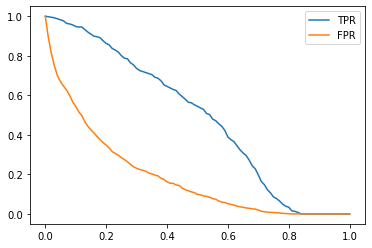

In [125]:
#plot

plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()

## Random Model

In [126]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1 , size =len(y_val))

In [127]:
#accuracy of model
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [128]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum() #true positive
        tn = (predict_negative & actual_negative).sum() #true negative

        fp = (predict_positive & actual_negative).sum() #false positive
        fn = (predict_negative & actual_positive).sum() #false negative

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
        
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    # plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
    # plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
    # plt.legend()

    return df_scores

In [129]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [130]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


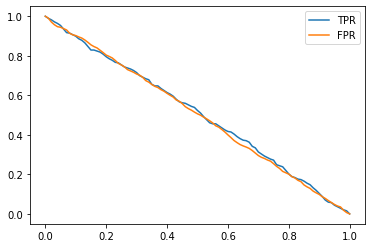

In [131]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

### ideal model

that gets outputs the correct prediction for everyone

In [132]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [133]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [134]:
#to get the ideal 
1 - y_val.mean()

0.7260468417317246

In [135]:
#the accuracy

((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [136]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [137]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


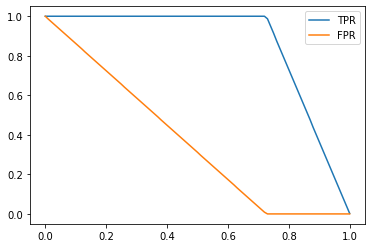

In [138]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

### plot all the model together

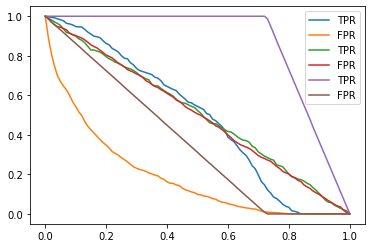

In [139]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')


plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')


plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

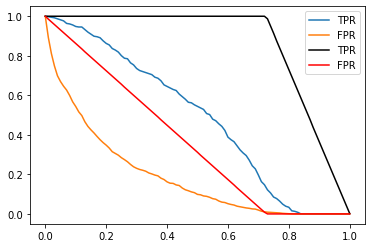

In [140]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')


plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR', color='red')
plt.legend()

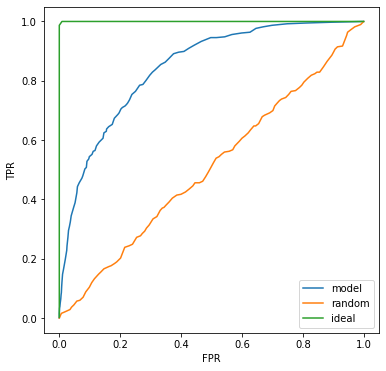

In [141]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

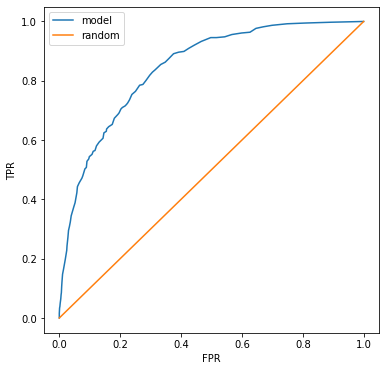

In [142]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0,1], label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [143]:
from sklearn.metrics import roc_curve

In [144]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

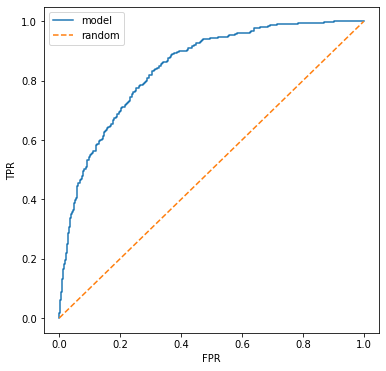

In [145]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0,1], label='random', linestyle='--')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label= 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## ROC AUC
- Area under the ROC curve - useful metric
- Interpretation of AUC

In [146]:
from sklearn.metrics import auc

In [147]:
auc(fpr, tpr)

0.8438479732980819

In [148]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [149]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [150]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [151]:
from sklearn.metrics import roc_auc_score

In [152]:
roc_auc_score(y_val, y_pred)

0.8438479732980819

In [153]:
#AUC interpretation

neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

neg, pos

(array([0.00899723, 0.20452842, 0.21222586, ..., 0.10786069, 0.31368935,
        0.1363944 ]),
 array([0.54304692, 0.58227816, 0.46169919, 0.73943251, 0.06580532,
        0.69174524, 0.2473706 , 0.69654314, 0.21209023, 0.66510122,
        0.47347937, 0.34865047, 0.15046205, 0.61756723, 0.76472163,
        0.1424865 , 0.43289598, 0.27301028, 0.06886064, 0.19233685,
        0.67063341, 0.41596936, 0.66202763, 0.5831711 , 0.5243959 ,
        0.4330797 , 0.46857486, 0.35115427, 0.56774623, 0.32177863,
        0.63522266, 0.7436973 , 0.73843642, 0.60892847, 0.70873527,
        0.76478363, 0.10729835, 0.18072033, 0.54204667, 0.57943413,
        0.43656315, 0.44060145, 0.75707274, 0.38574161, 0.69438701,
        0.41764925, 0.75786881, 0.30225749, 0.53389881, 0.58069041,
        0.15407142, 0.52946392, 0.78578446, 0.43644686, 0.67325828,
        0.77440708, 0.01263763, 0.35108121, 0.79769797, 0.58466202,
        0.6739176 , 0.24822498, 0.34497765, 0.70163564, 0.20961011,
        0.68593596, 0

In [154]:
#randomly select negative and positive example
import random

pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)
pos_ind, neg_ind

(111, 281)

how well our model can order customers

In [155]:
#exsperiment 

n= 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84426

In [156]:
#numpy version

n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84646

## Cross-Validation

In [179]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    mdel = LogisticRegression( max_iter=1000, C=C)
    model.fit(X_train, y_train)

    return dv, model


In [180]:
dv, model = train(df_train, y_train, C=10)

c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
#function of model for predict

def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [160]:
y_pred = predict(df_val, dv, model)

In [161]:
from sklearn.model_selection import KFold

In [162]:
kfold = KFold(n_splits = 10, shuffle = True, random_state=1)

In [163]:
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(5070, 564)

In [164]:
len(df_full_train)

5634

In [166]:
from tqdm.auto import tqdm

In [183]:
#for 5 folds

n_splits = 5

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in \
                tqdm(kfold.split(df_full_train), total = n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' %(C, np.mean(scores), np.std(scores))) 

 40%|████      | 2/5 [00:00<00:00,  3.22it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  3.30it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=0.001 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:01,  2.03it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  2.59it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=0.01 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:00,  3.11it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  2.82it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=0.1 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:01,  2.16it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  2.32it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=0.5 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:01,  2.48it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  2.31it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=1 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:00,  3.33it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  3.23it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=5 0.839 +- 0.008


 40%|████      | 2/5 [00:00<00:00,  3.42it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|████████  | 4/5 [00:01<00:00,  3.20it/s]c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

C=10 0.839 +- 0.008


In [ ]:
scores

In [184]:
#final model\
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259